# DATA 515: Software Design Homework 1
### Joel Stremmel

### Imports

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,9]

### 1. 
Read the CSV file into a pandas dataframe.

In [34]:
df = pd.read_csv('../data/Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv')

In [35]:
df.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,03/31/2019 11:00:00 PM,6.0,10.0
1,03/31/2019 10:00:00 PM,7.0,14.0
2,03/31/2019 09:00:00 PM,18.0,15.0
3,03/31/2019 08:00:00 PM,26.0,31.0
4,03/31/2019 07:00:00 PM,30.0,58.0


### 2. 
Add columns to the dataframe containing:
- The total (East + West) bicycle count
- The hour of the day
- The year

In [36]:
df['Total'] = df['Fremont Bridge East Sidewalk'] + df['Fremont Bridge West Sidewalk']

In [37]:
df['Hour'] = df['Date'].apply(lambda x: x.split(' ')[1] + ' ' + x.split(' ')[2])

In [38]:
df['Year'] = df['Date'].apply(lambda x: int(x.split(' ')[0].split('/')[2]))

In [39]:
df.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total,Hour,Year
0,03/31/2019 11:00:00 PM,6.0,10.0,16.0,11:00:00 PM,2019
1,03/31/2019 10:00:00 PM,7.0,14.0,21.0,10:00:00 PM,2019
2,03/31/2019 09:00:00 PM,18.0,15.0,33.0,09:00:00 PM,2019
3,03/31/2019 08:00:00 PM,26.0,31.0,57.0,08:00:00 PM,2019
4,03/31/2019 07:00:00 PM,30.0,58.0,88.0,07:00:00 PM,2019


### 3.
Create a dataframe with the subset of data from the year 2016

In [40]:
s_df = df[df['Year'] == 2016]

In [41]:
s_df.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total,Hour,Year
19680,12/31/2016 11:00:00 PM,4.0,4.0,8.0,11:00:00 PM,2016
19681,12/31/2016 10:00:00 PM,7.0,8.0,15.0,10:00:00 PM,2016
19682,12/31/2016 09:00:00 PM,4.0,6.0,10.0,09:00:00 PM,2016
19683,12/31/2016 08:00:00 PM,3.0,6.0,9.0,08:00:00 PM,2016
19684,12/31/2016 07:00:00 PM,6.0,4.0,10.0,07:00:00 PM,2016


### 4. 
Use pandas + matplotlib to plot the counts by hour.

In [42]:
grouped_df = df.groupby('Hour').sum().reset_index()

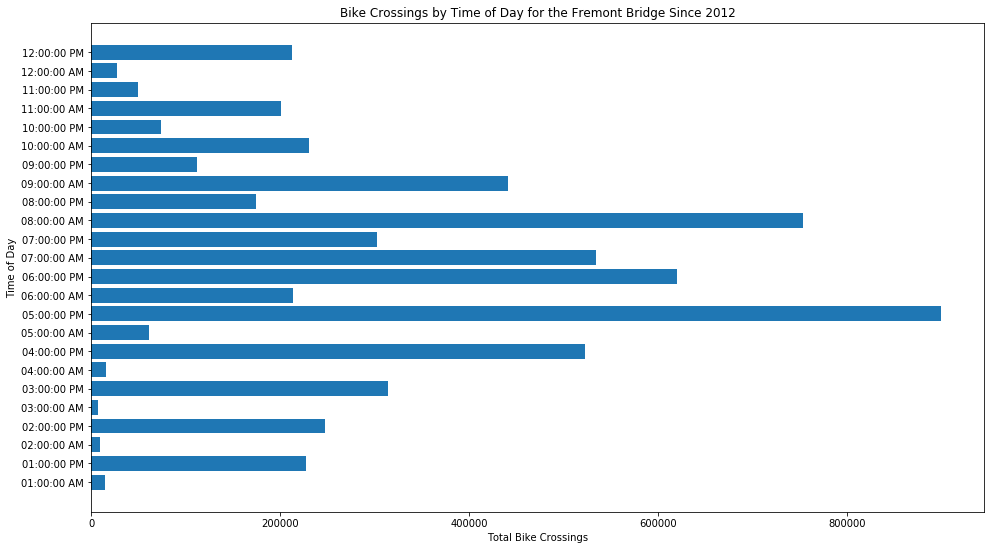

In [44]:
ys = [i for i in range(0, len(grouped_df['Hour']))]
plt.barh(ys, grouped_df['Total'], align='center')
plt.yticks(ys, grouped_df['Hour'])
plt.ylabel('Time of Day')
plt.xlabel('Total Bike Crossings')
plt.title('Bike Crossings by Time of Day for the Fremont Bridge Since 2012')
plt.show()

### 5. 
Use pandas to determine what is (on average) the busiest hour of the day.

In [46]:
grouped_df[grouped_df['Total'] == grouped_df['Total'].max()]

,Hour,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total,Year
9,05:00:00 PM,264525.0,635096.0,899621.0,4778751


As one might expect, the busiest hour of the day for bike crossings is 5PM.